In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path) #Read dataset from file csv
    data = data.values #Load values
    np.random.shuffle(data) #Shuffle dataset
    x = data[:, 1:].reshape(-1, 28, 28, 1)/255.0
    y = data[:, 0].astype(np.int32)
    y = tf.keras.utils.to_categorical(y, 10)
    return x, y
X_train, y_train = load_data("../input/mnist-in-csv/mnist_train.csv")
X_test, y_test = load_data("../input/mnist-in-csv/mnist_test.csv")
X = X_test

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
(10000, 28, 28, 1)


In [5]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))
model.summary()

2022-05-15 06:36:09.399957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

2022-05-15 06:36:09.526422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 06:36:09.527282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 06:36:09.528988: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-15 06:36:09.529351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, verbose = 1, validation_data = (X_test, y_test))

2022-05-15 06:36:12.481120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
469/469 [==============================] - 4s 4ms/step - loss: 0.3038 - accuracy: 0.9087 - val_loss: 0.1324 - val_accuracy: 0.9579
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1376 - accuracy: 0.9628 - val_loss: 0.0988 - val_accuracy: 0.9729
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1151 - accuracy: 0.9710 - val_loss: 0.1180 - val_accuracy: 0.9752
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1031 - accuracy: 0.9737 - val_loss: 0.1063 - val_accuracy: 0.9772
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0981 - accuracy: 0.9763 - val_loss: 0.1080 - val_accuracy: 0.9755
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - accuracy: 0.9789 - val_loss: 0.1084 - val_accuracy: 0.9757
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9797 - val_loss: 0.1074 - val_accuracy: 0.9756
Epoch 

In [8]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4682 - accuracy: 0.9829


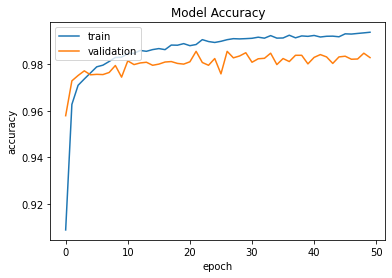

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [10]:
model.save('mnist_ann.h5')

In [11]:
y_pred = model.predict(X_test)

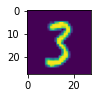

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


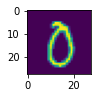

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


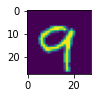

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


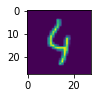

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


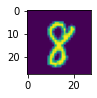

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


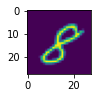

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


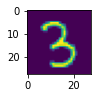

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


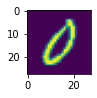

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


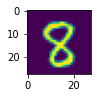

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[10+i])
  plt.show()  
  print(np.round(y_pred[10+i]))